<a href="https://colab.research.google.com/github/hrutik016/NLP-Classification/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
import random
import requests

def sample_books(book_urls, Author_name,book_name):
    # Create a list to store the DataFrames
    dataframes = []
    # Iterate over the book URLs and labels
    for url, label, title in zip(book_urls, Author_name,book_name):
        # Download book from Gutenberg
        book = requests.get(url)
        book = book.text
        # Split book into a list of words
        words = book.split()
        # Create a list to store the partitions
        partitions = []
        # Use a for loop to sample 200 partitions of 100 words each
        for i in range(200):
            start_index = random.randint(0, len(words) - 100)
            partition = words[start_index : start_index + 100]
            partitions.append(" ".join(partition))
        # Create a Pandas DataFrame to store the partitions
        data = {'text': partitions,'author': [label]*200,'book':title}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        dataframes.append(df)
    # Concatenate the DataFrames into a single DataFrame
    final_df = pd.concat(dataframes)
    #return dataframe
    return final_df


In [3]:
book_urls = ['http://www.gutenberg.org/files/1342/1342-0.txt', 'http://www.gutenberg.org/files/84/84-0.txt','https://www.gutenberg.org/files/2701/2701-0.txt','https://www.gutenberg.org/files/1228/1228-0.txt','https://www.gutenberg.org/files/2600/2600-0.txt']
Author_name = ['Jane Austen', 'Mary Wollstonecraft Shelley','Herman Melville', 'Charles Darwin','Leo Tolstoy']
book_name = ['Pride and prejudice', 'Frankenstein','Moby-Dick','The Origin of Species','War and Peace']
df = sample_books(book_urls, Author_name,book_name)

In [4]:
df.to_csv('text_data.csv',index=False)

In [5]:
# Load the data into a pandas dataframe
df = pd.read_csv("text_data.csv")

In [6]:
# Preprocess the data
df['text'] = df['text'].str.lower() # Convert to lowercase
df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]','') # Remove punctuation

<ipython-input-6-a490076a9bbe>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]','') # Remove punctuation


In [7]:
# Split the data into training, validation, and testing sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
# Transform the data into bag-of-words representation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
train_matrix = vectorizer.fit_transform(train_df['text'])
test_matrix = vectorizer.transform(test_df['text'])


## BaseLine Classifiers

### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
DST_Model = DecisionTreeClassifier()
DST_Model.fit(train_matrix,train_df['author'])
Cross_score_DST = cross_val_score(DST_Model,test_matrix,test_df['author'],cv=10)
DST_Score = DST_Model.score(test_matrix,test_df['author'])
print(DST_Score)

0.695


### SVM

In [10]:
from sklearn.svm import SVC
SVM_Model = SVC()
SVM_Model.fit(train_matrix,train_df['author'])
Cross_score_SVM = cross_val_score(SVM_Model,test_matrix,test_df['author'],cv=10)
SVM_Score = SVM_Model.score(test_matrix,test_df['author'])
print(SVM_Score)

0.84


### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
LogiReg_Model = LogisticRegression()
LogiReg_Model.fit(train_matrix,train_df['author'])
Cross_score_LogiReg = cross_val_score(LogiReg_Model,test_matrix,test_df['author'],cv=10)
LogiReg_Score = LogiReg_Model.score(test_matrix,test_df['author'])
print(LogiReg_Score)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.92


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(train_matrix,train_df['author'])
Cross_score_KNN = cross_val_score(KNN_Model,test_matrix,test_df['author'],cv=10)
KNN_Score = KNN_Model.score(test_matrix,test_df['author'])
print(KNN_Score)

# printing SD for variabiltiy

print("Standard Deviation of Accuracy: ", Cross_score_KNN.std())

0.68
Standard Deviation of Accuracy:  0.10781929326423911


Confusion Matrix: 
 [[34  3  1  0  0]
 [ 3 24  3  1  6]
 [ 0  2 27  0  4]
 [ 2  9 10 17  6]
 [ 4  0  9  1 34]]
Classification Report: 
                              precision    recall  f1-score   support

             Charles Darwin       0.79      0.89      0.84        38
            Herman Melville       0.63      0.65      0.64        37
                Jane Austen       0.54      0.82      0.65        33
                Leo Tolstoy       0.89      0.39      0.54        44
Mary Wollstonecraft Shelley       0.68      0.71      0.69        48

                   accuracy                           0.68       200
                  macro avg       0.71      0.69      0.67       200
               weighted avg       0.72      0.68      0.67       200



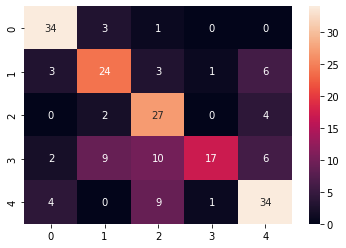

In [31]:
# by hrutik

# added classification report for error analysis

from sklearn.metrics import confusion_matrix, classification_report

y_pred = KNN_Model.predict(test_matrix)

cm = confusion_matrix(test_df['author'], y_pred)
print("Confusion Matrix: \n", cm)

# using classification report to have a have detailed breakdown of performance
cr = classification_report(test_df['author'], y_pred)
print("Classification Report: \n", cr)


### Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB
NB_Model = MultinomialNB()
NB_Model.fit(train_matrix,train_df['author'])
Cross_score_NB = cross_val_score(NB_Model,test_matrix,test_df['author'],cv=10)
NB_Score = NB_Model.score(test_matrix,test_df['author'])
print(NB_Score)

0.915


### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier()
RF_Model.fit(train_matrix,train_df['author'])
Cross_score_RF = cross_val_score(RF_Model,test_matrix,test_df['author'],cv=10)
RF_Score = RF_Model.score(test_matrix,test_df['author'])
print(RF_Score)

0.885


## Cross validation Score

In [15]:
Model_list = [DST_Model,KNN_Model,SVM_Model,NB_Model,RF_Model,LogiReg_Model]
Model_accuraies = [DST_Score,KNN_Score,SVM_Score,NB_Score,RF_Score,LogiReg_Score]

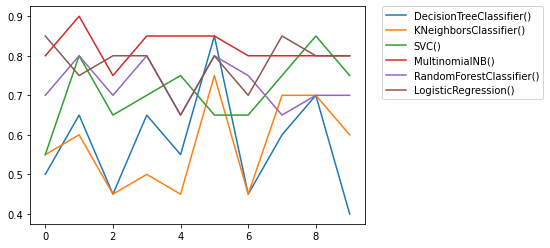

In [16]:
plt.plot(Cross_score_DST)
plt.plot(Cross_score_KNN)
plt.plot(Cross_score_SVM)
plt.plot(Cross_score_NB)
plt.plot(Cross_score_RF)
plt.plot(Cross_score_LogiReg)
plt.legend(Model_list,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Confusion Matrix

Confusion matrix for DecisionTreeClassifier()


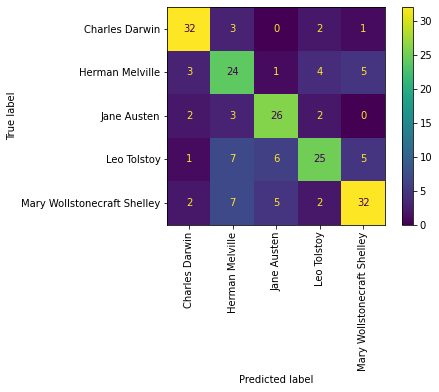

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print('Confusion matrix for',Model_list[0])
Model = Model_list[0]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')

Confusion matrix for KNeighborsClassifier()


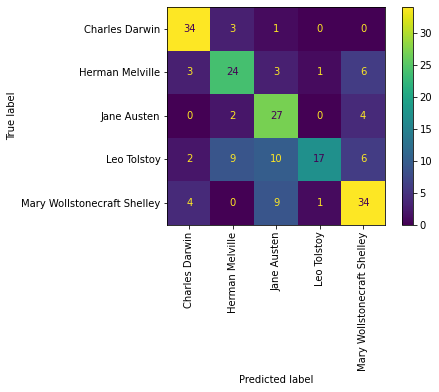

In [18]:
print('Confusion matrix for',Model_list[1])
Model = Model_list[1]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')

Confusion matrix for SVC()


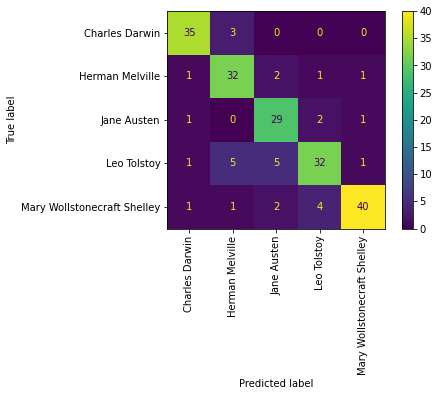

In [19]:
print('Confusion matrix for',Model_list[2])
Model = Model_list[2]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')

Confusion matrix for MultinomialNB()


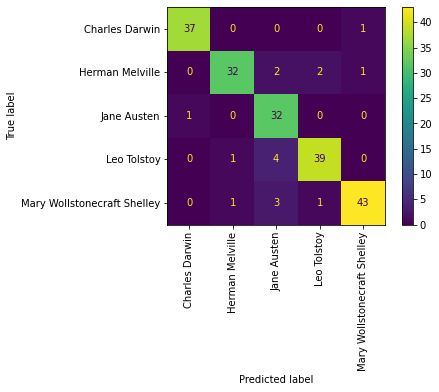

In [20]:
print('Confusion matrix for',Model_list[3])
Model = Model_list[3]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')

Confusion matrix for RandomForestClassifier()


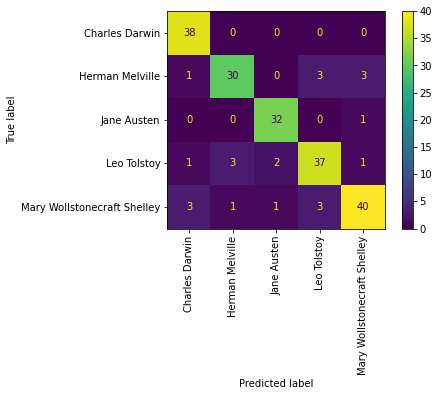

In [21]:
print('Confusion matrix for',Model_list[4])
Model = Model_list[4]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')

Confusion matrix LogisticRegression()


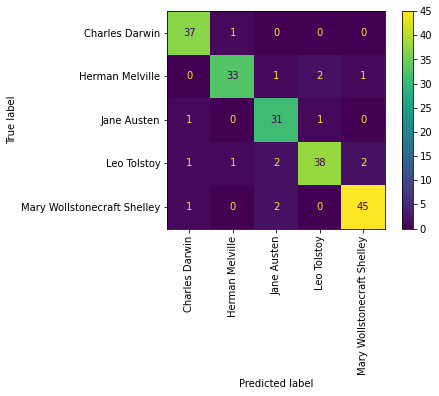

In [22]:
print('Confusion matrix',Model_list[5])
Model = Model_list[5]
ConfusionMatrixDisplay.from_estimator(Model,test_matrix,test_df['author'],xticks_rotation='vertical')

## Accuracy Comparision

<BarContainer object of 6 artists>

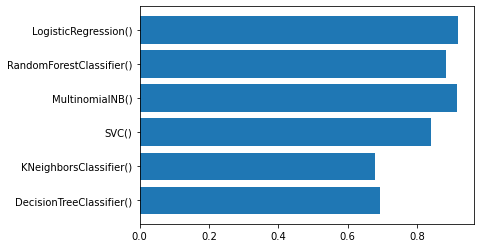

In [23]:
model_names = [str(model) for model in Model_list]
plt.barh(model_names,Model_accuraies)

In [24]:

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}


grid_search = GridSearchCV(NB_Model, param_grid, cv=5)


grid_search.fit(train_matrix,train_df['author'])

# get the best hyperparameters and the best score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best hyperparameters:  {'alpha': 0.1}
Best score:  0.9475


In [25]:
from sklearn.naive_bayes import MultinomialNB
NB_Model = MultinomialNB(alpha=0.1)
NB_Model.fit(train_matrix,train_df['author'])
Cross_score_NB = cross_val_score(NB_Model,test_matrix,test_df['author'],cv=10)
NB_Score = NB_Model.score(test_matrix,test_df['author'])
print(NB_Score)

0.945


In [26]:
Model_accuraies

[0.695, 0.68, 0.84, 0.915, 0.885, 0.92]